In [1]:
import pandas as pd
import numpy as np
import cobra
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from scipy.interpolate import interp1d
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
import requests
import time

from scipy.stats import mannwhitneyu 

/tmp/ipykernel_139566/2159061748.py:11: UserWarning: DelftStack
  warnings.warn('DelftStack')


In [2]:
#data
fpkm=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/KuangRNAseq_fpkm", sep="\t",index_col=0)
atac=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/GSE101290_normalized_atac_counts.csv",index_col=0)
OX= pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/kuangOX.txt", sep="\t")
RB= pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/kuangRB.txt", sep="\t")
RC= pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/kuangRC.txt", sep="\t")
SAM=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/vectorME_o2.csv", index_col=0)
ACOA=pd.read_csv("/home/bguzman/jupyter/UI/YMC/data/vectorAC_o2.csv", index_col=0,)
H3K9ac=pd.read_csv("/home/bguzman/jupyter/UI/YMC/analysis/dfi_T_all_ac.csv", index_col=0)
H3K4me3=pd.read_csv("/home/bguzman/jupyter/UI/YMC/analysis/dfi_T_all.csv", index_col=0)




In [3]:
fpkm

,T1_FPKM,T2_FPKM,T3_FPKM,T4_FPKM,T5_FPKM,T6_FPKM,T7_FPKM,T8_FPKM,T9_FPKM,T10_FPKM,T11_FPKM,T12_FPKM,T13_FPKM,T14_FPKM,T15_FPKM,T16_FPKM
gene_id,,,,,,,,,,,,,,,,
15S_rRNA,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
21S_rRNA,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
HRA1,927.966,109.226,125.226,136.698,792.653,897.187,991.899,115.986,114.283,809.309,380.763,277.785,55.807,736.891,667.206,709.043
ICR1,515.379,571.864,51.752,221.552,219.944,447.008,700.507,570.246,59.854,537.929,565.753,635.653,428.506,440.013,417.099,431.933
LSR1,389.332,280.868,339.197,438.271,364.162,205.075,185.296,153.299,245.821,168.054,201.252,256.848,277.323,377.042,322.357,394.962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tY(GUA)J2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
tY(GUA)M1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
tY(GUA)M2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [4]:
#only columns of RNA-seq 
df_fpkm=fpkm.iloc[0:-2,-16::] 

In [5]:
#mean between the different elements of replicates 1, 2; 3. 4; 5, 6.
genes=atac.index
T1=list((atac.iloc[: , 1].values+atac.iloc[: , 2].values)/2)
T2=list((atac.iloc[: , 3].values+atac.iloc[: , 4].values)/2)
T3=list((atac.iloc[: , 5].values+atac.iloc[: , 6].values)/2)
T4=list((atac.iloc[: , 7].values+atac.iloc[: , 8].values)/2)
T5=list((atac.iloc[: , 9].values+atac.iloc[: , 10].values)/2)
T6=list((atac.iloc[: , 11].values+atac.iloc[: , 12].values)/2)

In [6]:
import pandas as pd
import numpy as np
lst1 = genes
lst2 = T2 # RC
lst3= T3  # OX
lst4= T4  # OX
lst5= T5  # RB
lst6= T6  # RB
lst7= T1  # RC
atac_prom = pd.DataFrame(list(zip(lst1,lst2,lst3,lst4,lst5,lst6,lst7)), columns = ['Genes','T1','T2','T3','T4','T5','T6'])
# set the gene.id column as an index to make the heatmap
df_atac = atac_prom.set_index(['Genes'])
#df_atac

In [7]:
#Define lists with genes by stage
lista_RC=list(RC.iloc[0:-2,0])
lista_OX=list(OX.iloc[0:-2,0])
lista_RB=list(RB.iloc[0:-2,0])

In [8]:
#Stage lists in atac-seq
list_1=lista_RC
list_2=atac.index
from collections import Counter
cnt1 = Counter(list_1)
cnt2 = Counter(list_2)
lista_RB_ss= [key for key, counts in cnt2.items() if cnt1[key] == counts]

list_3=lista_OX
list_4=atac.index
from collections import Counter
cnt3 = Counter(list_3)
cnt4 = Counter(list_4)
lista_OX_ss= [key for key, counts in cnt4.items() if cnt3[key] == counts]

list_5=lista_RB
list_6=atac.index
from collections import Counter
cnt5 = Counter(list_5)
cnt6 = Counter(list_6)
lista_RB_ss= [key for key, counts in cnt6.items() if cnt5[key] == counts]

In [9]:
lista_RC_ss=[]
for gene in lista_RC:
    if gene in atac.index:
          lista_RC_ss.append(gene)

lista_OX_ss=[]
for gene in lista_OX:
    if gene in atac.index:
          lista_OX_ss.append(gene)
            
lista_RB_ss=[]
for gene in lista_RB:
    if gene in atac.index:
          lista_RB_ss.append(gene)

In [10]:
from scipy import stats
   
#correlation between precursor and mark
def ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa):
    # subsets the dataframe
    df = marcaEpigenetica.loc[genesEtapa]
    # Computes the correlation
    corr=[]
    for i in range(len(df)):
        a = np.array(df.iloc[i,:])
        b = np.array(perfilPrecursor)[0]
        corr.append(stats.pearsonr(a,b)[0])
    #ordenar corrlacion demayor a menor
    df_corr=pd.DataFrame(corr,index =df.index,columns = ['correlation'])
    corr_sort = df_corr.sort_values('correlation',ascending=False)

    return(corr_sort)


In [11]:
# Function to sort genes
    
#correlation between precursor and mark
def ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa):
    # subsets the dataframe
    df = marcaEpigenetica.loc[genesEtapa]
    # Computes the correlation
    corr=[]
    for i in range(len(df)):
        a = np.array(df.iloc[i,:])
        b = np.array(perfilPrecursor)[0]
        corr.append(stats.pearsonr(a,b)[0])
    #ordenar corrlacion demayor a menor
    df_corr=pd.DataFrame(corr,index =df.index,columns = ['correlation'])
    corr_sort = df_corr.sort_values('correlation',ascending=False)

    return(corr_sort)

T1


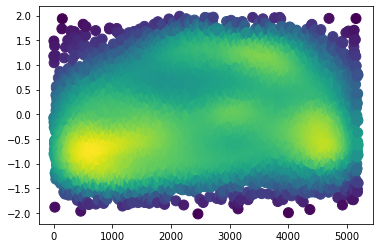

T2


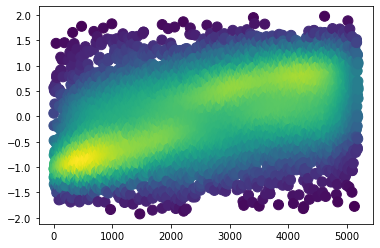

T3


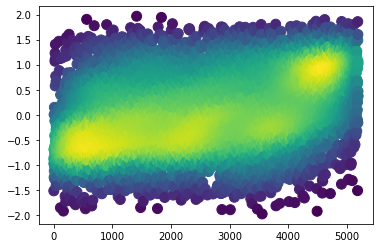

T4


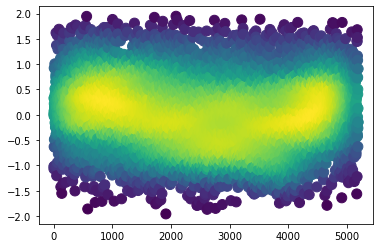

T5


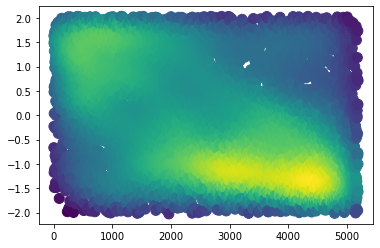

T6


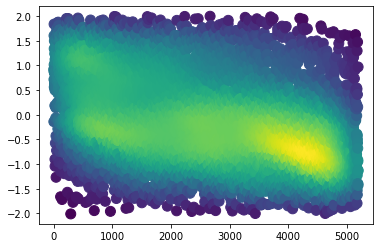

In [12]:
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA

timeT=[]
for i in range(1,7):
    timeT.append("T"+str(i))

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)

dfx=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


for time in timeT:
    print(time)
    # Generate data
    x = range(dfx[time].size)
    y = dfx[time]

    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    fig, ax = plt.subplots()
    ax.scatter(x, y, c=z, s=100)
    plt.show()

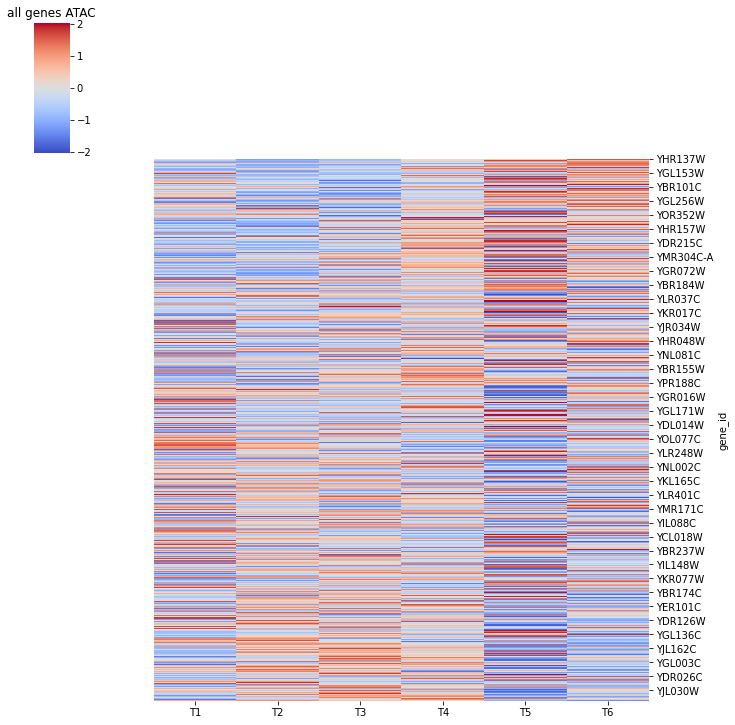

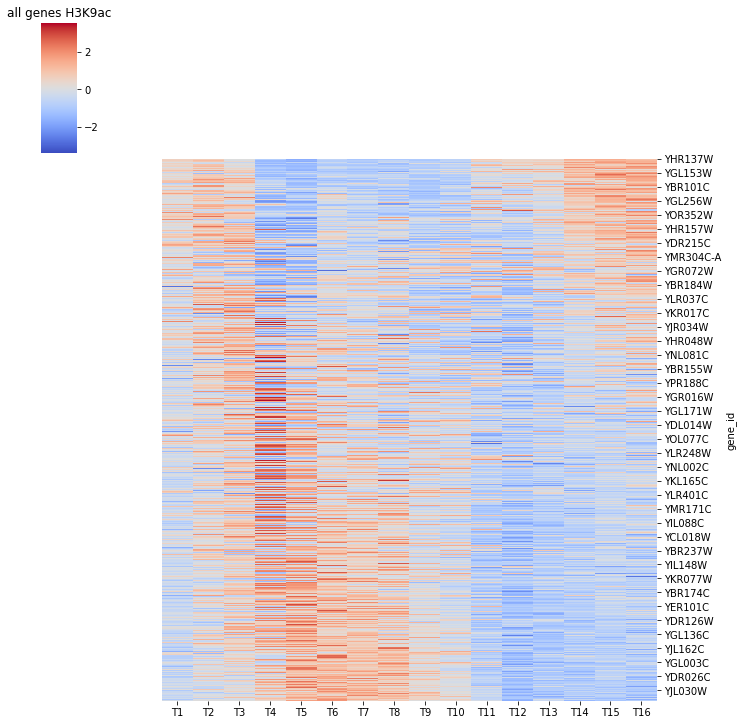

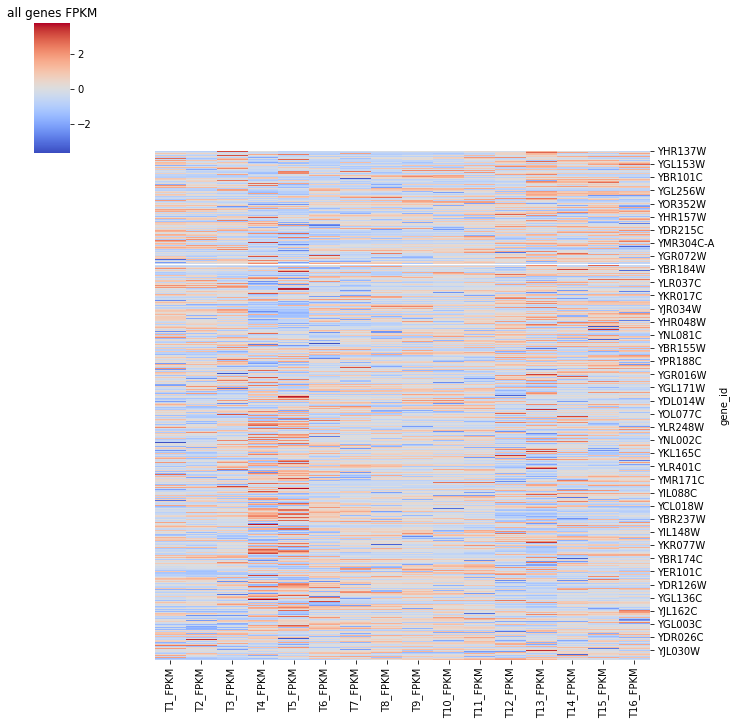

In [13]:
#H3K9Ac, all genes
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)

#ATAC
ACOA_atac=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(ACOA_atac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)
plt.title("all genes ATAC")
plt.savefig("allGenes_ACOA_atac.pdf")
#H3K9Ac
ACOA_H3K9ac=H3K9ac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(ACOA_H3K9ac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)
plt.title("all genes H3K9ac")    
plt.savefig("allGenes__ACOA_H3K9ac.pdf")
#FPKM
ACOA_fpkm=fpkm.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(ACOA_fpkm, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
)
plt.title("all genes FPKM")
plt.savefig("allGenes__fpkm_ac.pdf")

RC

OX

RB



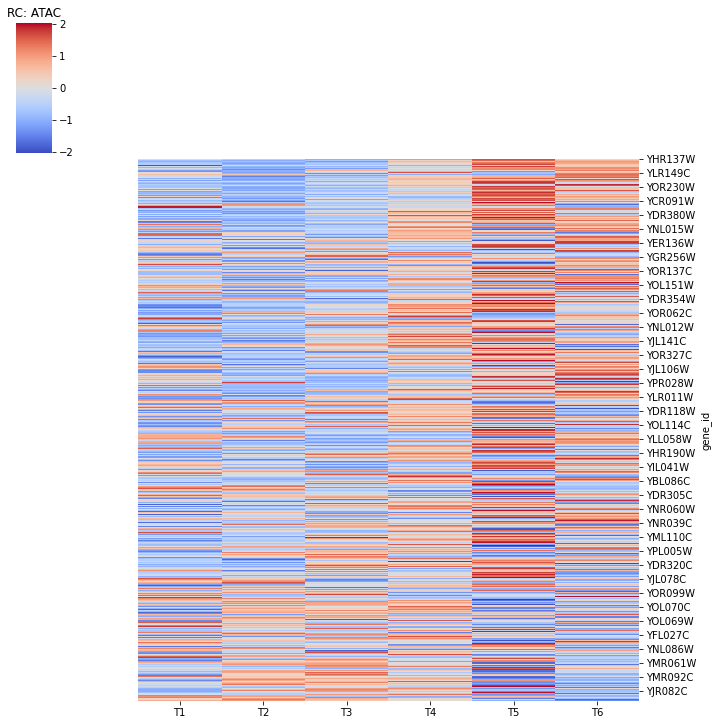

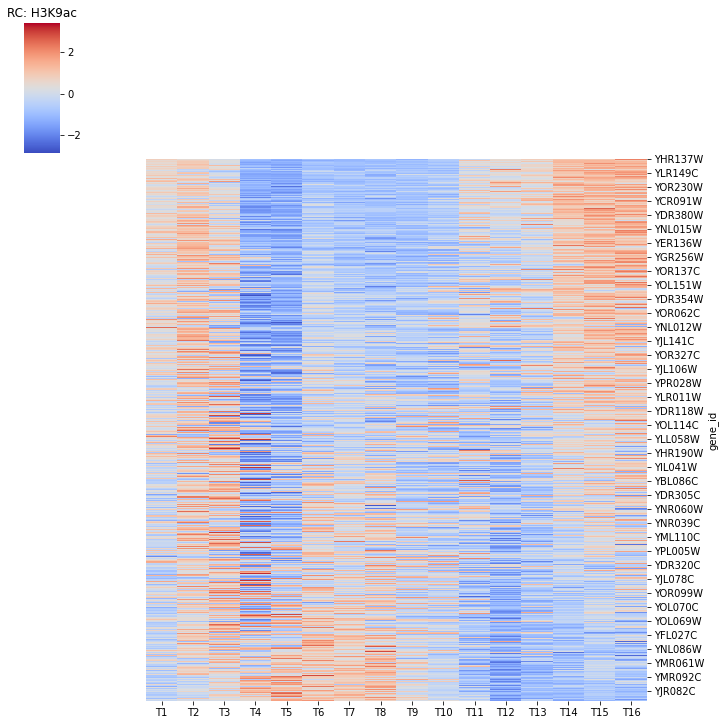

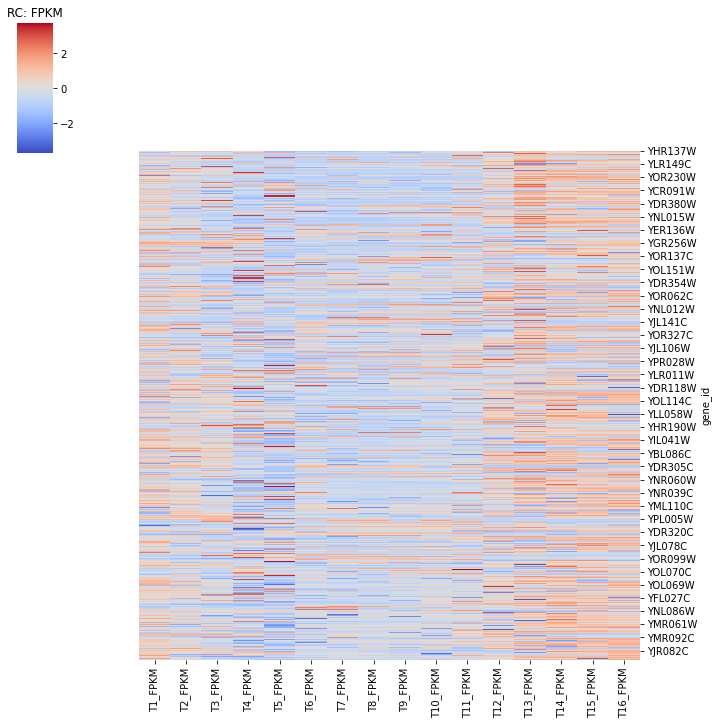

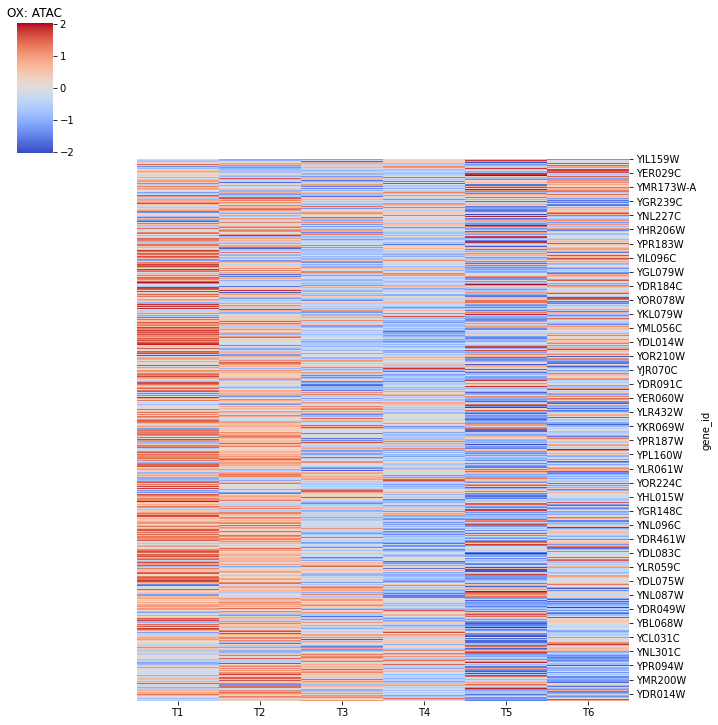

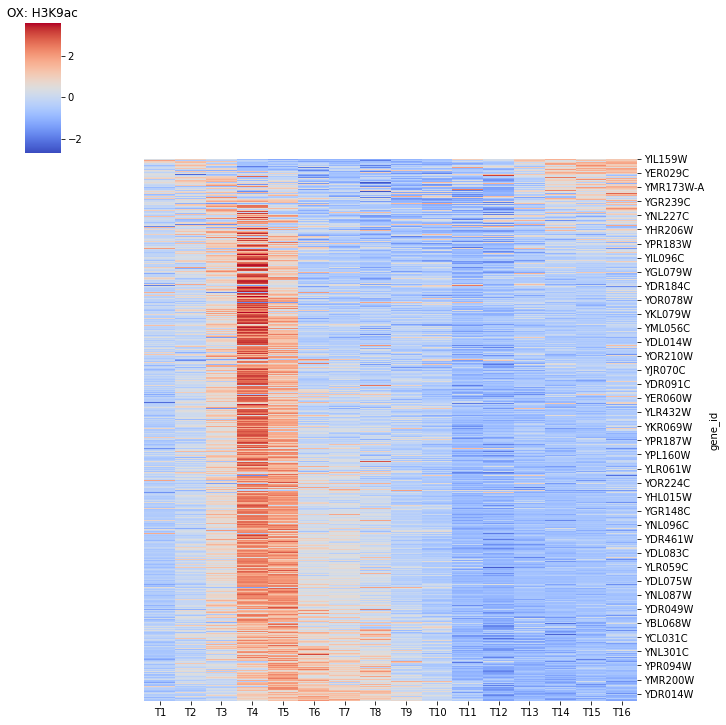

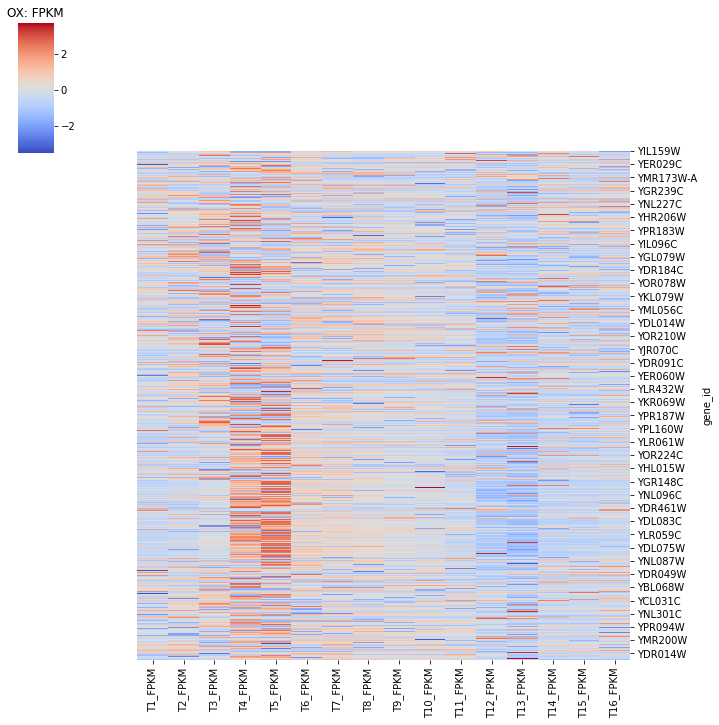

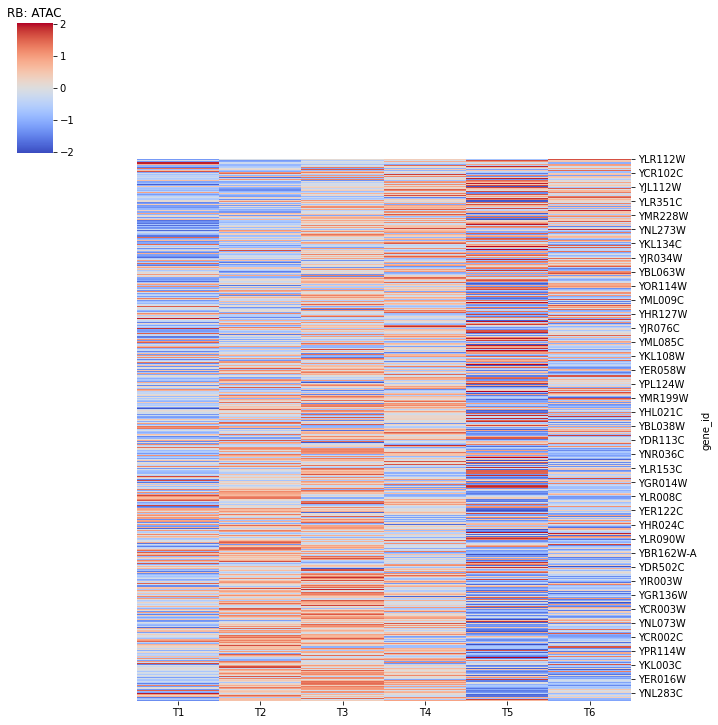

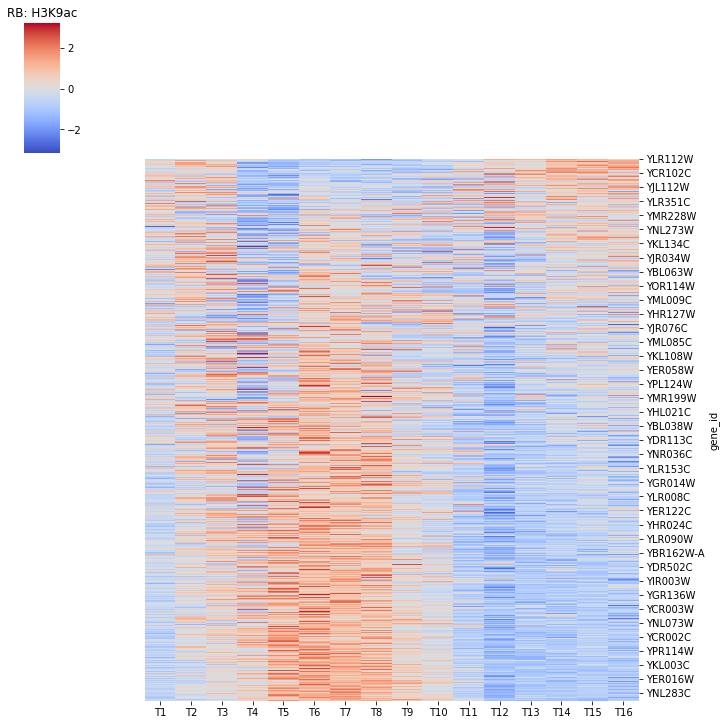

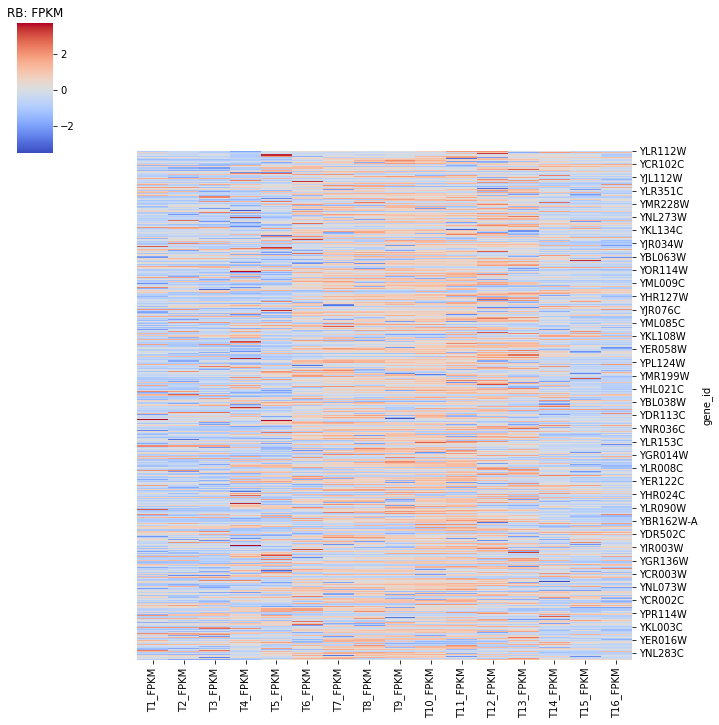

In [14]:
#H3K9Ac
marcaEpigenetica= H3K9ac
perfilPrecursor= ACOA

for etapa in ["RC","OX","RB"]:
    print(etapa)
    print("=====================================================================\n")
    genesEtapa = {"RC":lista_RC_ss,"OX":lista_OX_ss,"RB":lista_RB_ss}[etapa]
    genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)

    #ATAC
    ACOA_atac=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
    ax=sns.clustermap(ACOA_atac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
    )
    plt.title(etapa+": ATAC")
    plt.savefig(etapa+"_ACOA_atac.pdf")
    #H3K9Ac
    ACOA_H3K9ac=H3K9ac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
    ax=sns.clustermap(ACOA_H3K9ac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
    )
    plt.title(etapa+": H3K9ac")    
    plt.savefig(etapa+"_ACOA_H3K9ac.pdf")
    #FPKM
    ACOA_fpkm=fpkm.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
    ax=sns.clustermap(ACOA_fpkm, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
    )
    plt.title(etapa+": FPKM")
    plt.savefig(etapa+"_fpkm_ac.pdf")

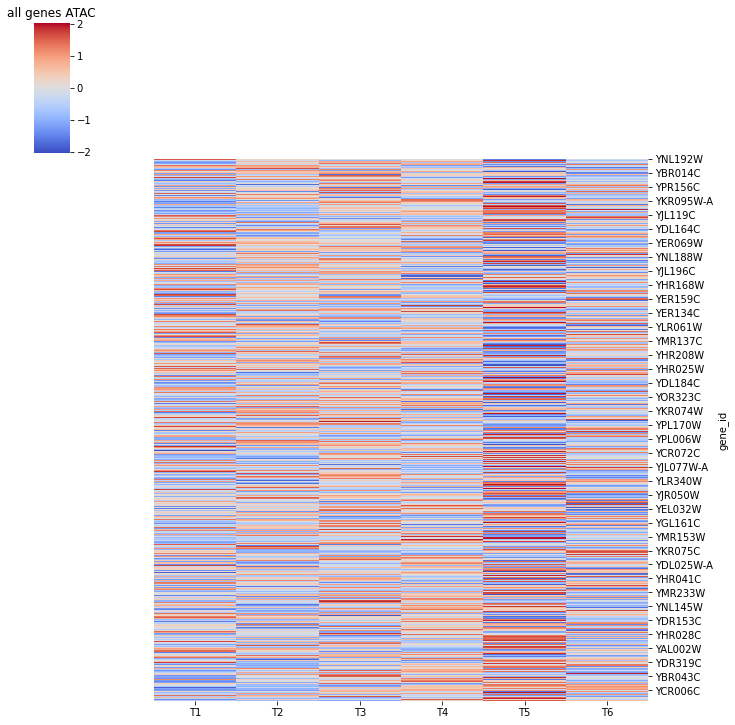

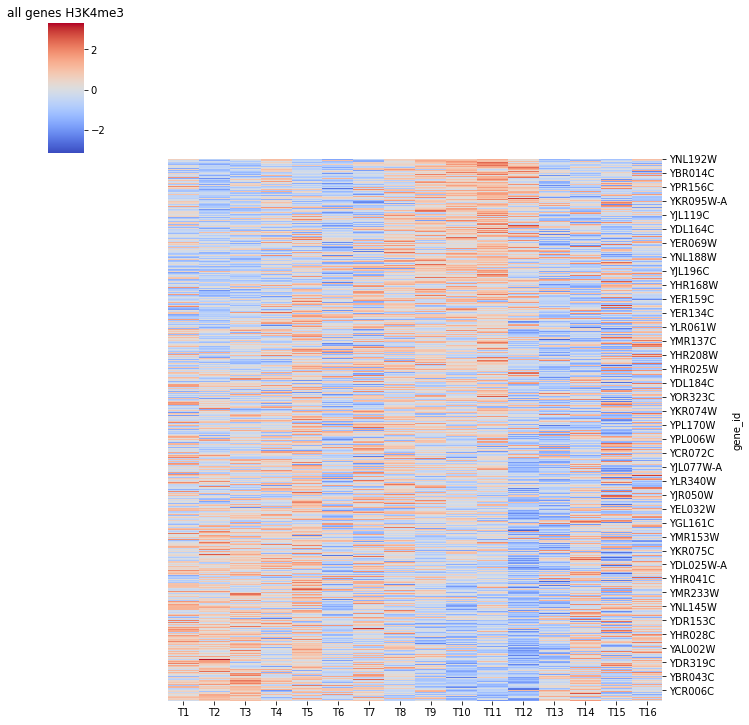

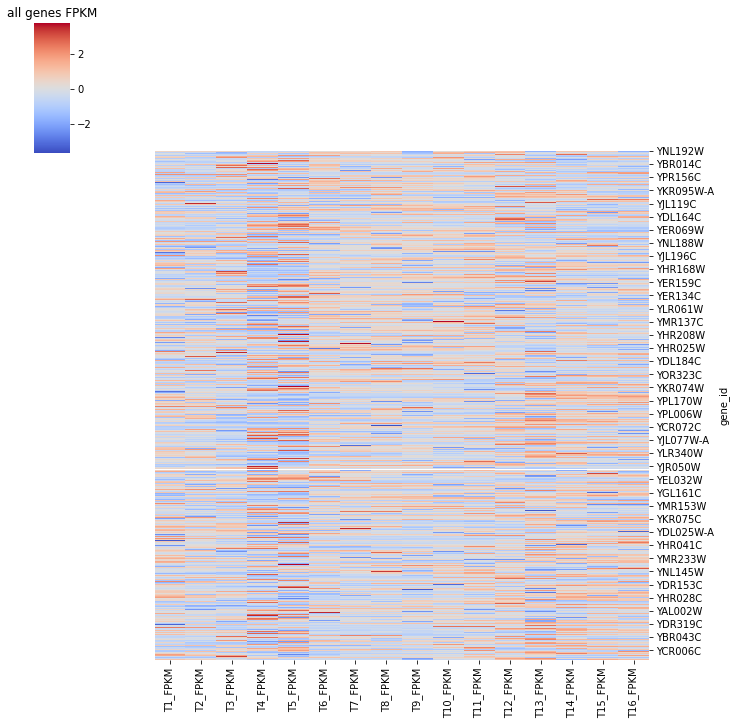

In [15]:
#H3K4me3 all genes
marcaEpigenetica= H3K4me3
perfilPrecursor= SAM

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)

#ATAC
SAM_atac=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(SAM_atac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, 
row_cluster=False)
plt.title("all genes ATAC")
plt.savefig("allGenes_SAM_atac.pdf")
#H3K9Ac
SAM_H3K4me3=H3K4me3.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(SAM_H3K4me3, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, 
row_cluster=False)
plt.title("all genes H3K4me3")    
plt.savefig("allGenes_SAM_H3K4me3.pdf")
#FPKM
SAM_fpkm=fpkm.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
ax=sns.clustermap(SAM_fpkm, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, 
row_cluster=False)
plt.title("all genes FPKM")
plt.savefig("allGenes_SAM_fpkm.pdf")

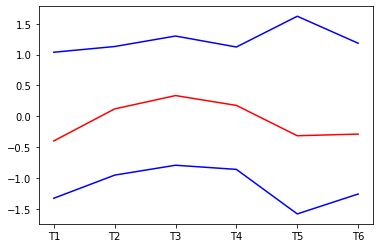

In [16]:
plt.plot(df_atac.loc[lista_RB_ss].apply(lambda x: (x-x.mean())/x.std(), axis = 1).quantile(0.5),"r")
plt.plot(df_atac.loc[lista_RB_ss].apply(lambda x: (x-x.mean())/x.std(), axis = 1).quantile(0.1),"b")
plt.plot(df_atac.loc[lista_RB_ss].apply(lambda x: (x-x.mean())/x.std(), axis = 1).quantile(0.9),"b")

T1


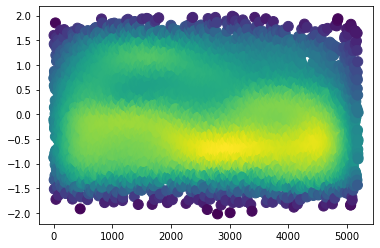

T2


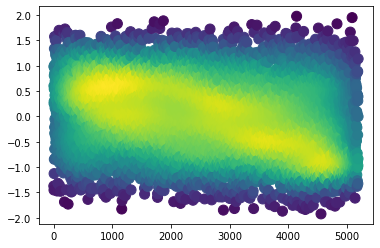

T3


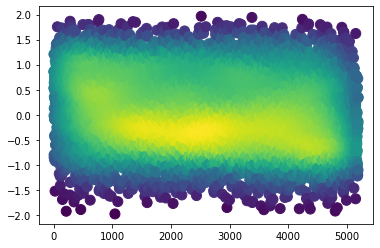

T4


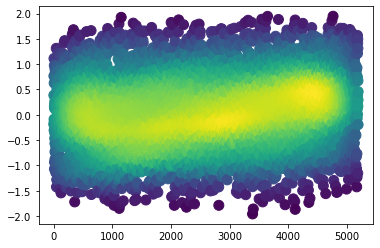

T5


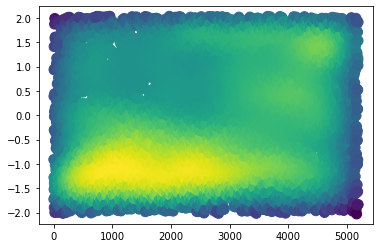

T6


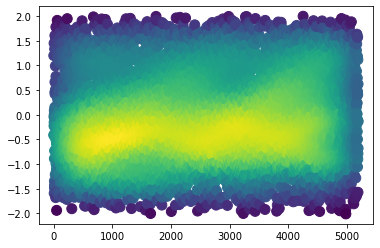

In [17]:
marcaEpigenetica= H3K4me3
perfilPrecursor= SAM

timeT=[]
for i in range(1,7):
    timeT.append("T"+str(i))
dfx[timeT]

genesEtapa = list(atac.index)
genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)

dfx=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


for time in timeT:
    print(time)
    # Generate data
    x = range(dfx[time].size)
    y = dfx[time]

    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    fig, ax = plt.subplots()
    ax.scatter(x, y, c=z, s=100)
    plt.show()

In [18]:
dfx[timeT].size

31158

RC

OX

RB



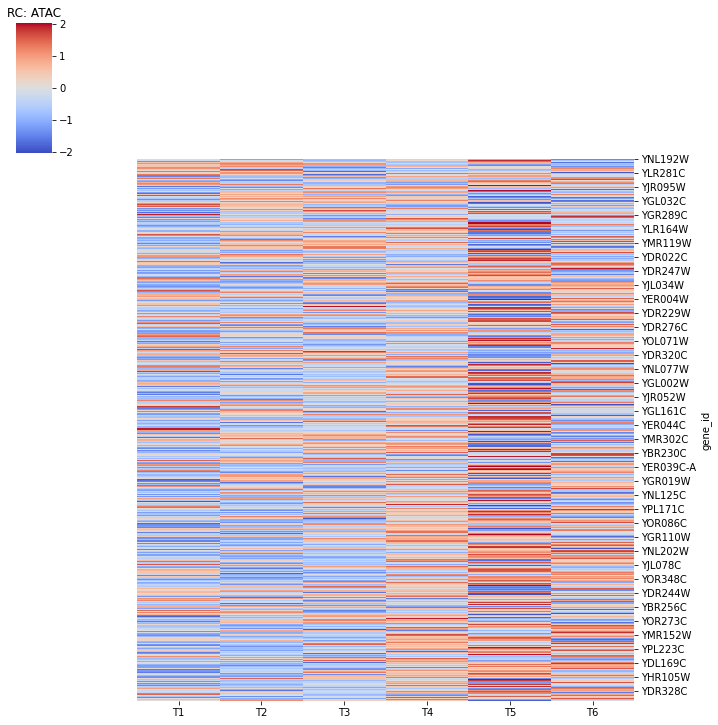

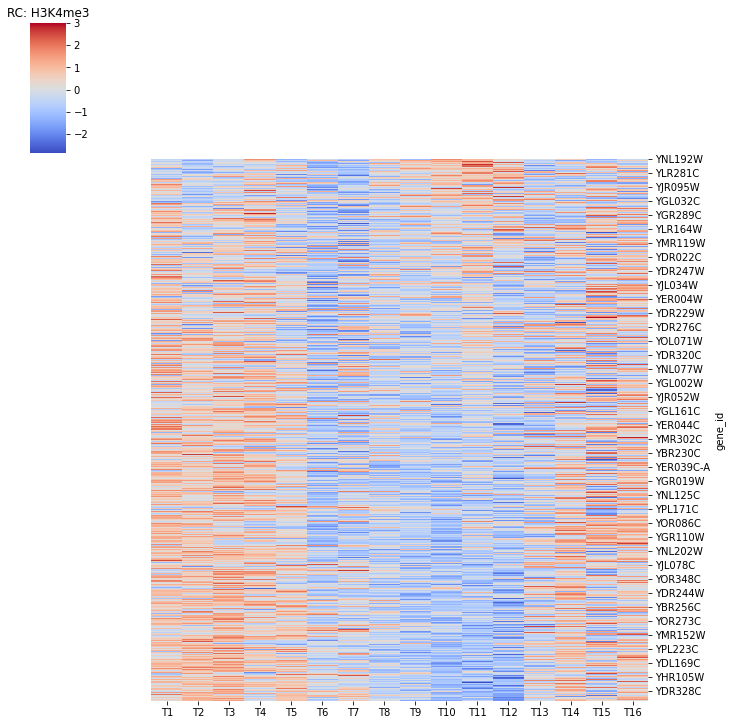

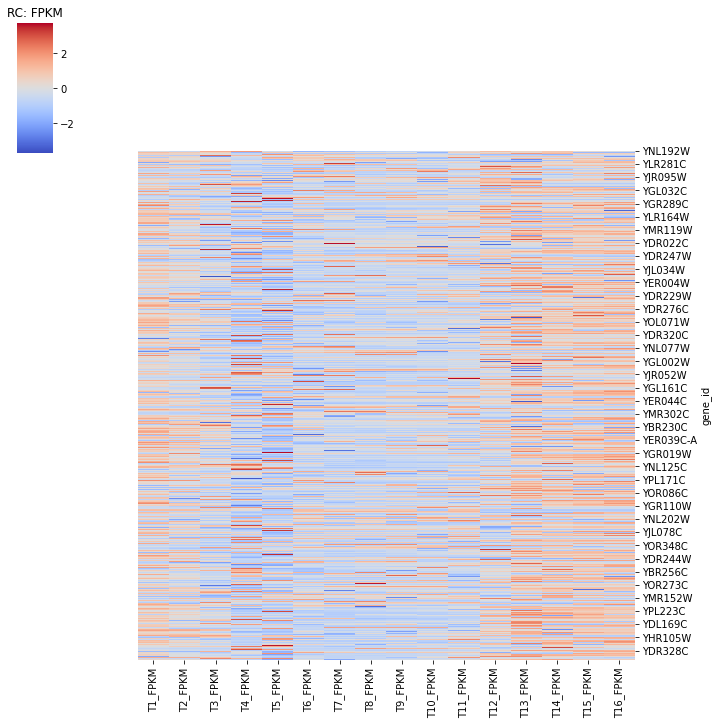

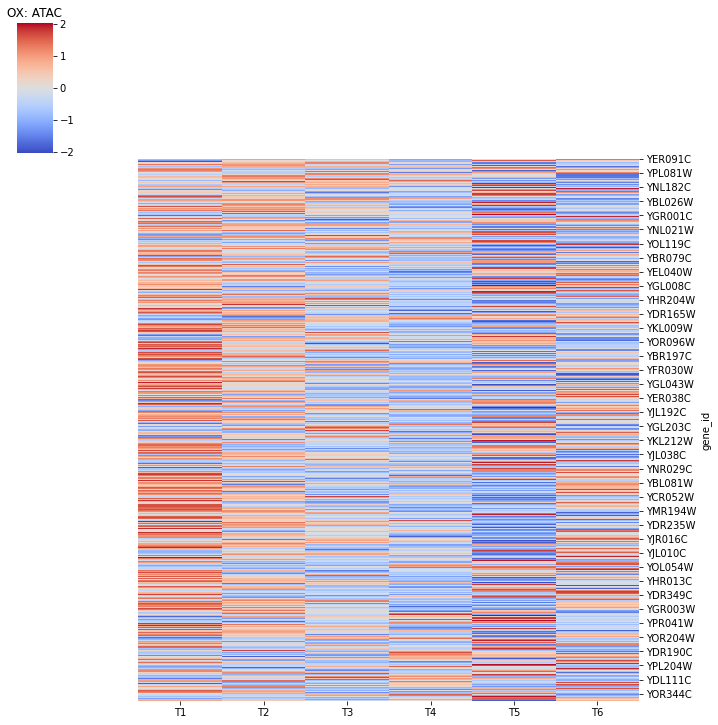

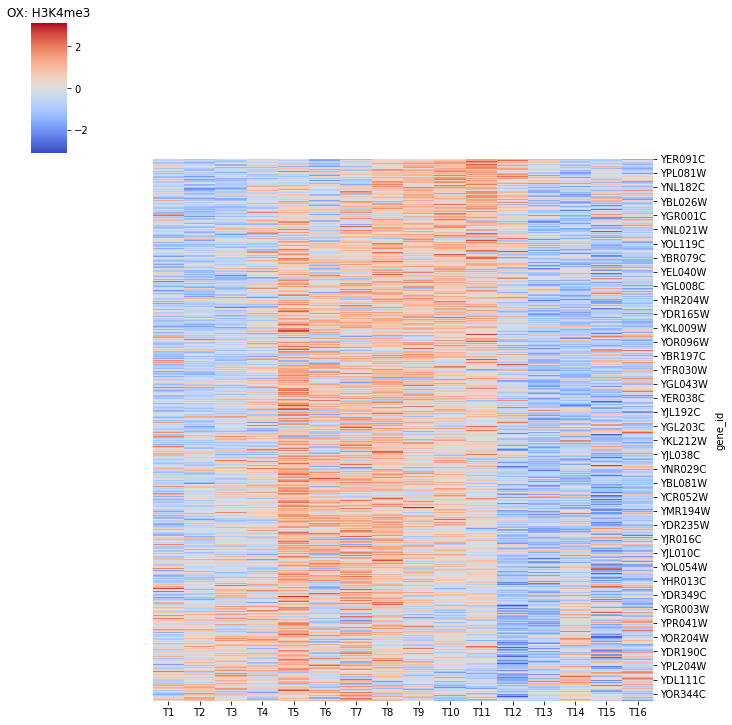

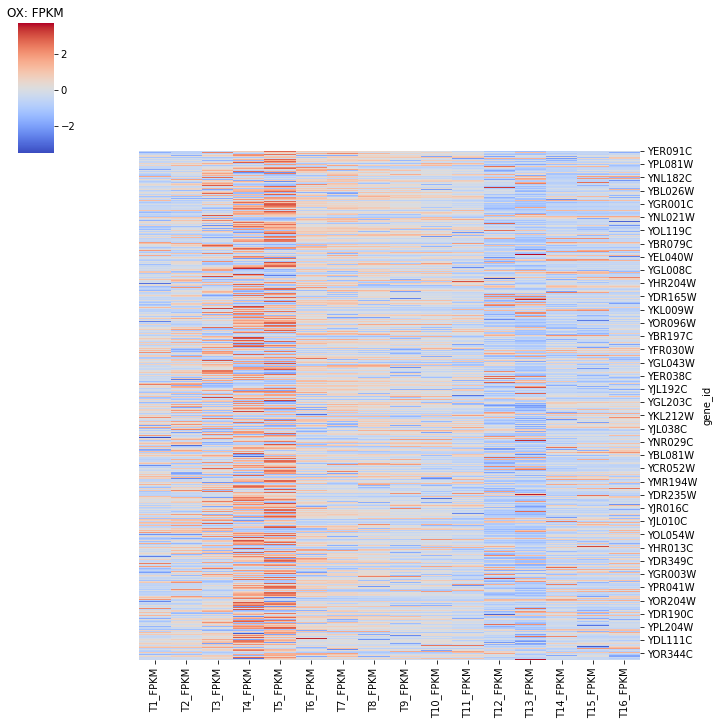

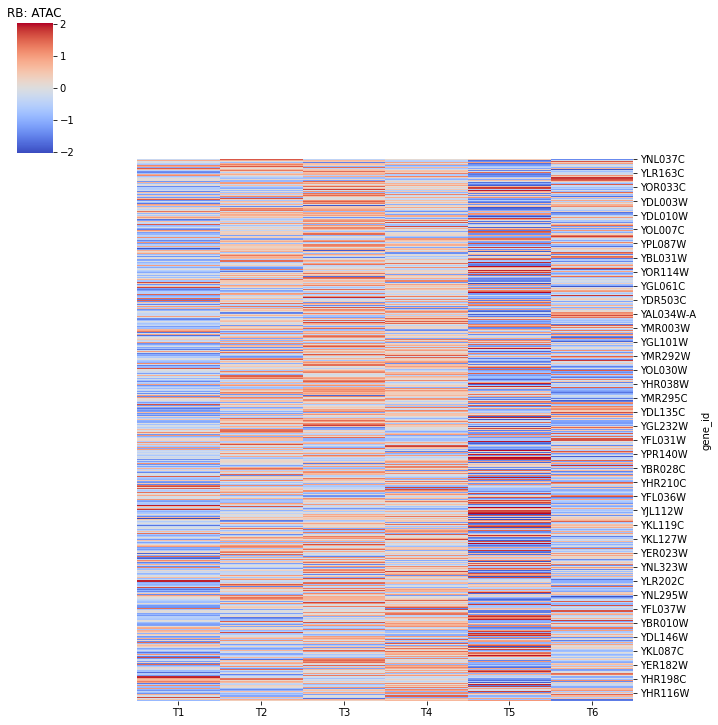

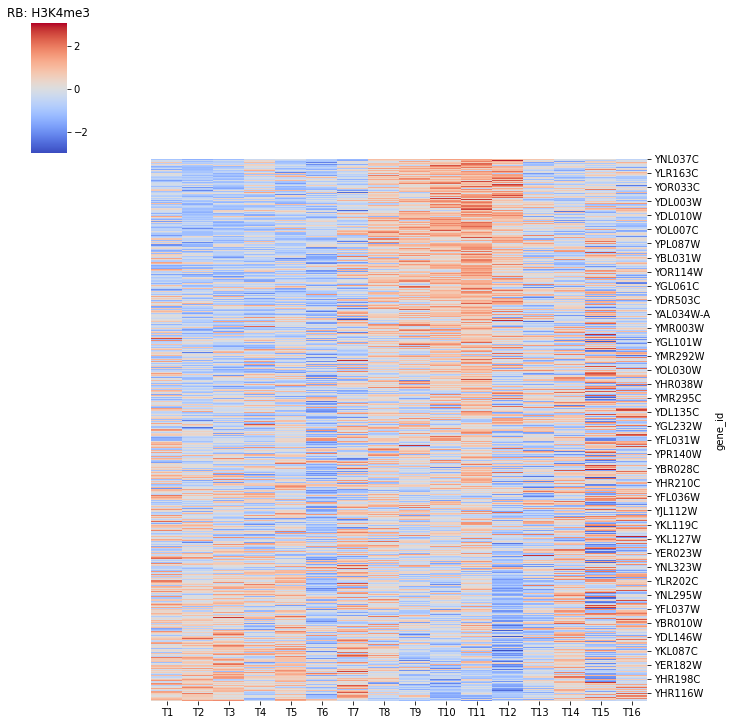

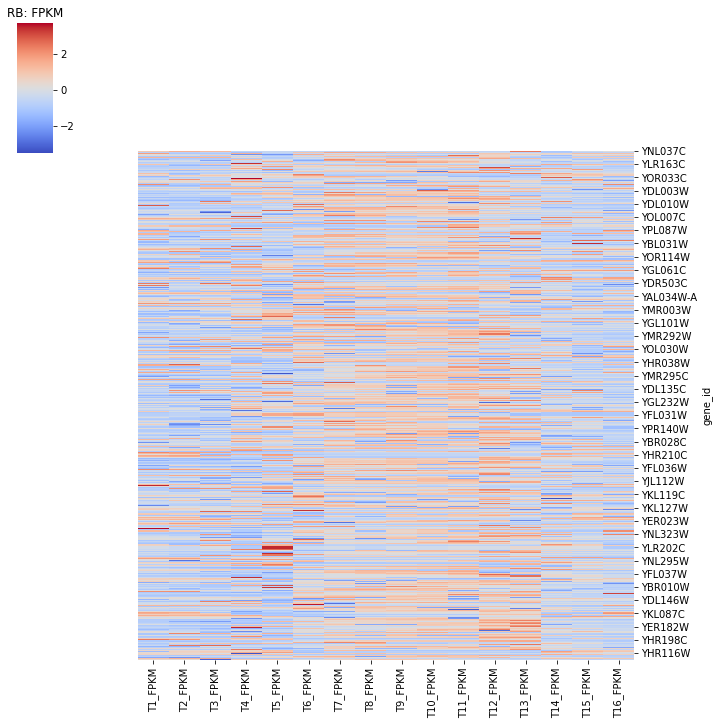

In [19]:
#H3K4me3
marcaEpigenetica= H3K4me3
perfilPrecursor= SAM

for etapa in ["RC","OX","RB"]:
    print(etapa)
    print("=====================================================================\n")
    genesEtapa = {"RC":lista_RC_ss,"OX":lista_OX_ss,"RB":lista_RB_ss}[etapa]
    genesEtapa_ordenados = ordenarDF(marcaEpigenetica,perfilPrecursor,genesEtapa)

    #ATAC
    SAM_atac=df_atac.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
    ax=sns.clustermap(SAM_atac, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
    )
    plt.title(etapa+": ATAC")
    plt.savefig(etapa+"_SAM_atac.pdf")
    #H3K9Ac
    SAM_H3K4me3=H3K4me3.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
    ax=sns.clustermap(SAM_H3K4me3, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
    )
    plt.title(etapa+": H3K4me3")    
    plt.savefig(etapa+"_SAM_H3K4me3.pdf")
    #FPKM
    SAM_fpkm=fpkm.loc[genesEtapa_ordenados.index].apply(lambda x: (x-x.mean())/x.std(), axis = 1)
    ax=sns.clustermap(SAM_fpkm, cmap=sns.color_palette("coolwarm", as_cmap=True),col_cluster=False, row_cluster=False
    )
    plt.title(etapa+": FPKM")
    plt.savefig(etapa+"_SAM_fpkm.pdf")